In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation

# import import_ipynb
# from utils import *

# The Environment Class

* initializing parametres
    - grid_size     -> the grid is fixed to be a square for now
    - density       -> inital density of life cell (before first evolution)
    - seed          -> seed for fixing random stuff  
    - save_states   -> keeps all states until done=True; needed for render function; the saved states are disposed at reset
* step function 
    - creates a copy of the state 
    - returns 
        - the state itself (not a copy)
        - reward - number of live cells after the update
        - done flag - true when 
            1. reward = 0
            2. the state is the same as the previous one
            3. after the 200th update  
* reset  
* render - to do; for now we plot seperatetly from the env and we have to save all the states  for the animation to work

In [4]:
class GameOfLifeEnv():
    
    def __init__(self, seed=None, grid_size=5, density=0.2, save_states=False, max_generations=400):
        
        self.grid_size = grid_size
        self.density = density
        self.save_states = save_states
        
        self.action_dict = {}
        self.max_generations = max_generations
        self.seed = seed
        self.reset()
        
    def step(self, action):
        
        aux_grid = self.state.copy()
        
        # take action
        if action != None:
            row = action // self.grid_size
            col = action % self.grid_size
            aux_grid[row, col] = 1
#         print('steita sq, predi evol:\n', aux_grid)

        
        # evolution by game rules
        for row in range(self.grid_size):
            for col in range(self.grid_size):
                live = self.count_live_neighbours(aux_grid, row, col)

                # if cell is alive and has exactly 2 or 3 living neighbours, it survives
                if aux_grid[row][col] == 1 and (live == 2 or live == 3):
                    self.state[row][col] = 1

                # if cell is dead and has exactly 3 living neighbours, it lives
                elif aux_grid[row][col] == 0 and live == 3:
                    self.state[row][col] = 1
                    
                else: 
                    self.state[row][col] = 0
          

        reward = np.sum(self.state) / self.grid_size ** 2
        self.generation += 1
        
        if self.save_states:
            self.states[self.generation] = np.copy(self.state)
            
        done = False
# -----------------
#         if old_state_id == new_state_id:
#             reward = 0
#             done = True
# -----------------
        if (np.sum(self.state) / self.grid_size ** 2 == 0
#                     or np.array_equal(self.state, aux_grid)
                    or self.generation > self.max_generations ):
            
            done = True
            if self.save_states:
                self.states = self.states[:self.generation + 1]
                            
        return self.state, reward, done
        
        
    def count_live_neighbours(self, grid, row, col):
        live = 0
        n = self.grid_size
        for i in range(row - 1, row + 2, 1):
            for j in range(col - 1, col + 2, 1):
                live += grid[(i + n) % n][(j + n) % n]
        live -= grid[row][col]
        return live
    
        
#     def set_seed(self, seed):
#         np.random.seed(seed)
        
    
    def reset(self):
        n = self.grid_size
        self.generation = 0
#         np.random.seed(self.seed)
        rng = np.random.RandomState(self.seed)

        # init grid 
        grid = rng.rand(self.grid_size, self.grid_size)
        for row in range(n):
            for col in range(n):
                grid[row][col] = 1 if grid[row][col] < self.density else 0
                
        self.state = grid.astype(int)
        
        if self.save_states:
            self.states = np.zeros((self.max_generations + 3 , n, n))
            self.states[0] = self.state
        
        return self.state
    
        
    def render(self):
        if not self.save_states:
            print('Render function can only be used if the flag save_states is True !')
             
        fig, ax = plt.subplots(1, 1, figsize=(4, 4)) 
        plt.grid(color='w', linestyle='-', linewidth=(8/self.grid_size))
        
        ax.set_xticks(np.arange(-0.5, self.grid_size, 1))
        ax.set_yticks(np.arange(-0.5, self.grid_size, 1))
        ax.set_xticklabels(['']*(self.grid_size+1))
        ax.set_yticklabels(['']*(self.grid_size+1))

        im = ax.imshow(self.states[0], vmin=0, vmax=2, cmap=plt.cm.gray)

        def init():
            im.set_data(self.states[0])
        
        def animate(i):
            im.set_data(self.states[i])
            ax.set_title('generation {} \n live: {}'.format(i, np.sum(self.states[i])))   

        ani = matplotlib.animation.FuncAnimation(fig, animate, init_func = init, frames = range(len(self.states)), interval=150)
        return ani

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


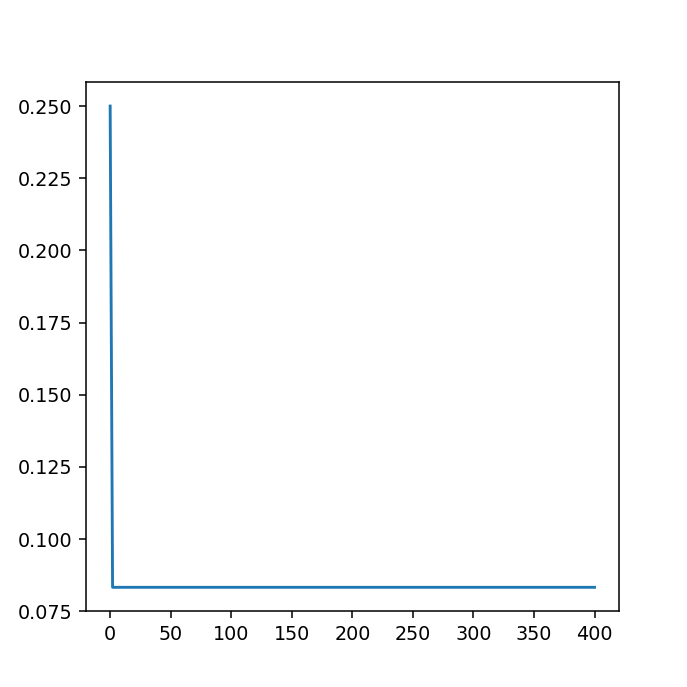

In [5]:
# %matplotlib notebook
# env = GameOfLifeEnv(grid_size=6, seed=19, save_states = True)
# state = env.reset()
# rewards = []

# done = False
# while not done:
#     state, r, done = env.step(None)
#     rewards.append(r)
    
# ani = env.render()
# fig, ax = plt.subplots(1, 1, figsize=(5, 5))
# ax.plot(rewards)
# plt.show()